In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [87]:
data = pd.read_csv("D:\\OneDrive - TVS Motor Company Ltd\\Desktop\\TRAINING\\Day17\\water_potability.csv")

In [88]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [181]:
list(data.columns)

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [182]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.506098,0.634092,0.339577,0.556122,0.766098,0.749073,0.366777,0.701540,0.439700,0
1,0.265434,0.400536,0.304277,0.505466,0.695516,0.787006,0.536396,0.454267,0.667852,0
2,0.578509,0.693963,0.325175,0.706626,0.695516,0.555665,0.596065,0.535646,0.453470,0
3,0.594055,0.663440,0.359618,0.613951,0.741920,0.482206,0.651467,0.809207,0.686863,0
4,0.649445,0.560471,0.293644,0.498713,0.644732,0.528857,0.408420,0.258048,0.604700,0
...,...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.599404,0.777122,0.545946,0.748286,0.698785,0.490969,0.537804,0.658231,1
3272,0.557775,0.599006,0.283041,0.614105,0.691363,0.520944,0.703294,0.536610,0.415231,1
3273,0.672822,0.543948,0.541517,0.559932,0.691363,0.573504,0.390073,0.563269,0.489520,1
3274,0.366197,0.713670,0.195728,0.480183,0.691363,0.534794,0.394662,0.624905,0.698718,1


In [183]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.506098,0.634092,0.339577,0.556122,0.766098,0.749073,0.366777,0.701540,0.439700,0
1,0.265434,0.400536,0.304277,0.505466,0.695516,0.787006,0.536396,0.454267,0.667852,0
2,0.578509,0.693963,0.325175,0.706626,0.695516,0.555665,0.596065,0.535646,0.453470,0
3,0.594055,0.663440,0.359618,0.613951,0.741920,0.482206,0.651467,0.809207,0.686863,0
4,0.649445,0.560471,0.293644,0.498713,0.644732,0.528857,0.408420,0.258048,0.604700,0


In [184]:
data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,0.333436,0.599404,0.777122,0.545946,0.748286,0.698785,0.490969,0.537804,0.658231,1
3272,0.557775,0.599006,0.283041,0.614105,0.691363,0.520944,0.703294,0.536610,0.415231,1
3273,0.672822,0.543948,0.541517,0.559932,0.691363,0.573504,0.390073,0.563269,0.489520,1
3274,0.366197,0.713670,0.195728,0.480183,0.691363,0.534794,0.394662,0.624905,0.698718,1
3275,0.562477,0.603800,0.284256,0.572050,0.691363,0.434676,0.570331,0.634665,0.342655,1


In [185]:
def load_dataset(file_name):
    return pd.read_csv(file_name)

In [186]:
data=load_dataset("D:\\OneDrive - TVS Motor Company Ltd\\Desktop\\TRAINING\\Day17\\water_potability.csv")

In [187]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [188]:
def dataset_info(df):
    print("Data set file coloumns Info")
    print(df.info())
    print("Data set shape")
    print(df.shape)

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [190]:
data.shape

(3276, 10)

In [191]:
dataset_info(data)

Data set file coloumns Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
Data set shape
(3276, 10)


In [192]:
def dataset_missing_data(df):
    return df.isnull().sum() # checks for missing data

In [193]:
dataset_missing_data(data)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [194]:
data.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [195]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [196]:
# clean_fix_values
data.dropna()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [197]:
# cleaning missing values 
data_cleaned=data.dropna()
data_cleaned

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [198]:
data_cleaned = data.dropna()
data_cleaned

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [199]:
data_cleaned=data.dropna(axis=1)
data_cleaned

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability
0,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135,0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656,0
2,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934,0
3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075,0
...,...,...,...,...,...,...,...
3271,193.681735,47580.991603,7.166639,526.424171,13.894419,4.435821,1
3272,193.553212,17329.802160,8.061362,392.449580,19.903225,2.798243,1
3273,175.762646,33155.578218,7.350233,432.044783,11.039070,3.298875,1
3274,230.603758,11983.869376,6.303357,402.883113,11.168946,4.708658,1


In [200]:
data_cleaned=data.dropna(axis=0)
data_cleaned

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [201]:
data_cleaned = data.dropna(how='all')
data_cleaned

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [202]:
data_cleaned=data.dropna()
data_cleaned

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [203]:
def clean_fix_values(df):
    df_1= df.dropna()
    df_1.reset_index(drop=True, inplace=True)
    df_2=df.fillna(df.mean()) # cleaning the data & fixing the missing values

In [204]:
data_cleaned.reset_index(drop=True,inplace=True)
data_cleaned

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
2009,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [205]:
data.mean()

ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
Potability             0.390110
dtype: float64

In [206]:
data_cleaned.mean()

ph                     7.085990
Hardness             195.968072
Solids             21917.441374
Chloramines            7.134338
Sulfate              333.224672
Conductivity         426.526409
Organic_carbon        14.357709
Trihalomethanes       66.400859
Turbidity              3.969729
Potability             0.403282
dtype: float64

In [207]:
data_cleaned_new=data.fillna(data.mean())
data_cleaned_new

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [208]:
data.isna()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [209]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [210]:
data_cleaned.isna()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2006,False,False,False,False,False,False,False,False,False,False
2007,False,False,False,False,False,False,False,False,False,False
2008,False,False,False,False,False,False,False,False,False,False
2009,False,False,False,False,False,False,False,False,False,False


In [211]:
data_cleaned.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [212]:
data_cleaned_new.isna()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,False,False,False,False,False,False
3273,False,False,False,False,False,False,False,False,False,False
3274,False,False,False,False,False,False,False,False,False,False


In [213]:
data_cleaned_new.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [214]:
def plot_coloumns_data(df):
    df.hist(figsize=(20,15))
    plt.show()

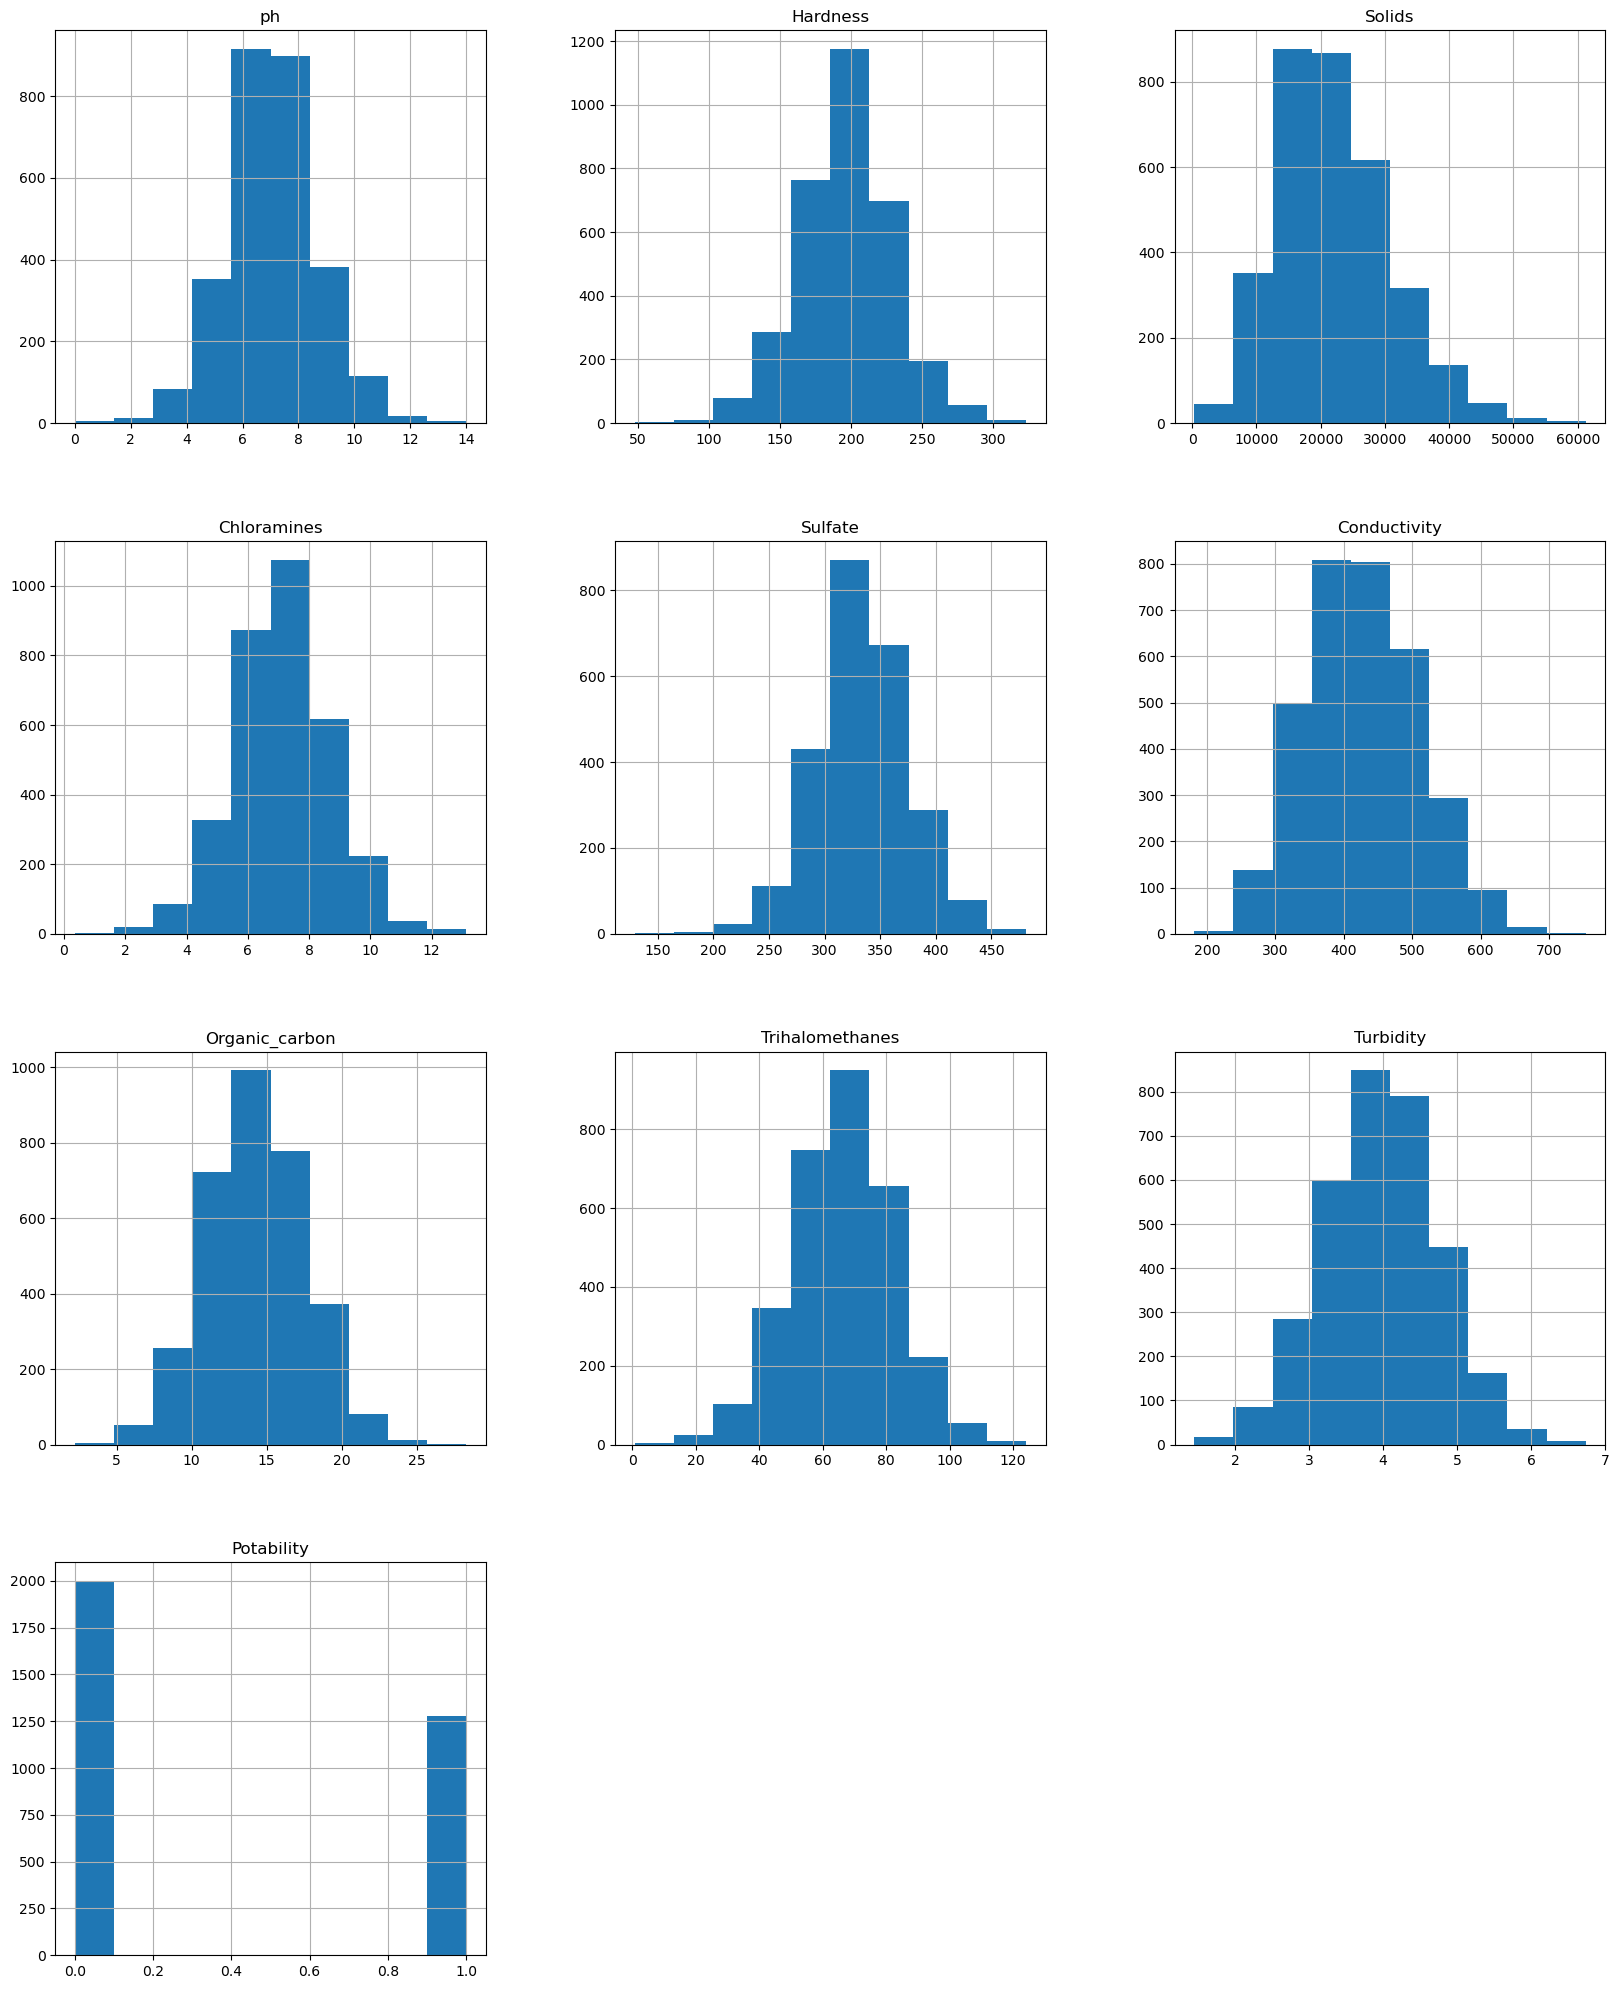

In [215]:
data.hist(figsize=(20,25))
plt.show()

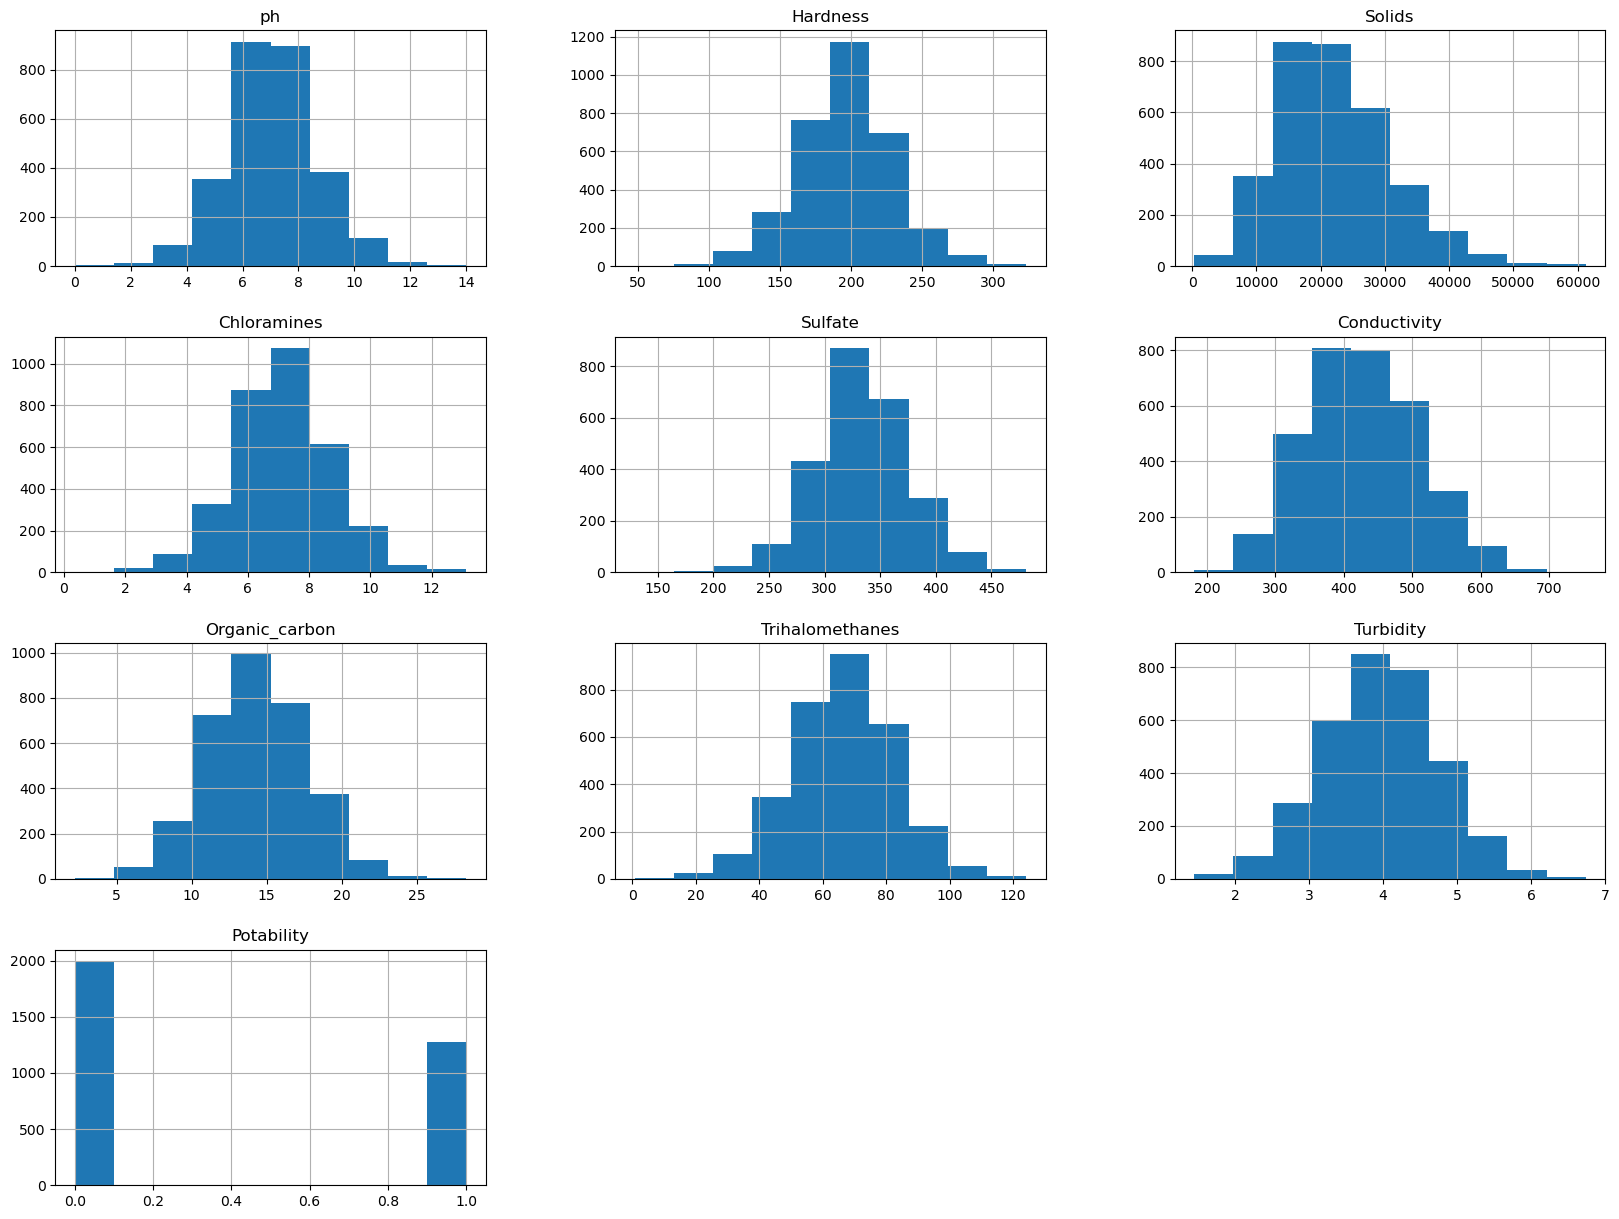

In [216]:
plot_coloumns_data(data)

In [217]:
data['ph'].isna()

0        True
1       False
2       False
3       False
4       False
        ...  
3271    False
3272    False
3273    False
3274    False
3275    False
Name: ph, Length: 3276, dtype: bool

In [218]:
data_ph = [1 if i is True else 0 for i in data.isna()]
data['ph'].isna().sum()

491

In [219]:
data['Sulfate'].isna()

0       False
1        True
2        True
3       False
4       False
        ...  
3271    False
3272     True
3273     True
3274     True
3275     True
Name: Sulfate, Length: 3276, dtype: bool

In [220]:
data['Sulfate'].isna().sum()

781

In [221]:
data['Trihalomethanes'].isna().sum()

162

In [222]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### Cleaning - Missing Value Handling

In [223]:
data['ph']

0            NaN
1       3.716080
2       8.099124
3       8.316766
4       9.092223
          ...   
3271    4.668102
3272    7.808856
3273    9.419510
3274    5.126763
3275    7.874671
Name: ph, Length: 3276, dtype: float64

In [224]:
data['ph'].mean()

7.080794504276835

In [225]:
data.groupby('Potability')['ph'].transform('mean')

0       7.085378
1       7.085378
2       7.085378
3       7.085378
4       7.085378
          ...   
3271    7.073783
3272    7.073783
3273    7.073783
3274    7.073783
3275    7.073783
Name: ph, Length: 3276, dtype: float64

In [226]:
data['ph'] = data['ph'].fillna(data.groupby('Potability')['ph'].transform('mean'))
data['ph']

0       7.085378
1       3.716080
2       8.099124
3       8.316766
4       9.092223
          ...   
3271    4.668102
3272    7.808856
3273    9.419510
3274    5.126763
3275    7.874671
Name: ph, Length: 3276, dtype: float64

In [227]:
data['ph']

0       7.085378
1       3.716080
2       8.099124
3       8.316766
4       9.092223
          ...   
3271    4.668102
3272    7.808856
3273    9.419510
3274    5.126763
3275    7.874671
Name: ph, Length: 3276, dtype: float64

In [228]:
data['Sulfate']

0       368.516441
1              NaN
2              NaN
3       356.886136
4       310.135738
           ...    
3271    359.948574
3272           NaN
3273           NaN
3274           NaN
3275           NaN
Name: Sulfate, Length: 3276, dtype: float64

In [229]:
data['Sulfate'].mean()

333.7757766108135

In [230]:
data.groupby('Potability')['Sulfate'].transform('mean')

0       334.56429
1       334.56429
2       334.56429
3       334.56429
4       334.56429
          ...    
3271    332.56699
3272    332.56699
3273    332.56699
3274    332.56699
3275    332.56699
Name: Sulfate, Length: 3276, dtype: float64

In [231]:
data['Sulfate']=data['Sulfate'].fillna(data.groupby('Potability')['Sulfate'].transform('mean'))
data['Sulfate']

0       368.516441
1       334.564290
2       334.564290
3       356.886136
4       310.135738
           ...    
3271    359.948574
3272    332.566990
3273    332.566990
3274    332.566990
3275    332.566990
Name: Sulfate, Length: 3276, dtype: float64

In [232]:
data['Trihalomethanes']

0        86.990970
1        56.329076
2        66.420093
3       100.341674
4        31.997993
           ...    
3271     66.687695
3272           NaN
3273     69.845400
3274     77.488213
3275     78.698446
Name: Trihalomethanes, Length: 3276, dtype: float64

In [233]:
data['Trihalomethanes'].mean()

66.39629294676803

In [234]:
data.groupby('Potability')['Trihalomethanes'].transform('mean')

0       66.303555
1       66.303555
2       66.303555
3       66.303555
4       66.303555
          ...    
3271    66.539684
3272    66.539684
3273    66.539684
3274    66.539684
3275    66.539684
Name: Trihalomethanes, Length: 3276, dtype: float64

In [235]:
data['Trihalomethanes']=data['Trihalomethanes'].fillna(data.groupby('Potability')['Trihalomethanes'].transform('mean'))
data['Trihalomethanes']

0        86.990970
1        56.329076
2        66.420093
3       100.341674
4        31.997993
           ...    
3271     66.687695
3272     66.539684
3273     69.845400
3274     77.488213
3275     78.698446
Name: Trihalomethanes, Length: 3276, dtype: float64

In [236]:
data.isna().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Normalizing - adjust the values of features in a dataset to a common scale

#### Max Abs Scaling:

Formula:
𝑋′=𝑋 / ∣𝑋max∣

​
 
Purpose: Scales data to the range [-1, 1]
 by dividing by the maximum absolute value of each feature.
Use Case: Often used for data that is sparse and contains 
both positive and negative values.

In [237]:
list(data.columns)

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [238]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,332.566990,392.449580,19.903225,66.539684,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,332.566990,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,332.566990,402.883113,11.168946,77.488213,4.708658,1


In [239]:
data['ph']= data['ph']/max(data['ph'])
data['ph']

0       0.506098
1       0.265434
2       0.578509
3       0.594055
4       0.649445
          ...   
3271    0.333436
3272    0.557775
3273    0.672822
3274    0.366197
3275    0.562477
Name: ph, Length: 3276, dtype: float64

In [240]:
data['Hardness']= data['Hardness']/max(data['Hardness'])
data['Hardness']

0       0.634092
1       0.400536
2       0.693963
3       0.663440
4       0.560471
          ...   
3271    0.599404
3272    0.599006
3273    0.543948
3274    0.713670
3275    0.603800
Name: Hardness, Length: 3276, dtype: float64

In [241]:
data['Hardness']= data['Hardness']/max(data['Hardness'])
data['Hardness']

0       0.634092
1       0.400536
2       0.693963
3       0.663440
4       0.560471
          ...   
3271    0.599404
3272    0.599006
3273    0.543948
3274    0.713670
3275    0.603800
Name: Hardness, Length: 3276, dtype: float64

In [242]:
data['Solids']= data['Solids']/max(data['Solids'])
data['Solids']

0       0.339577
1       0.304277
2       0.325175
3       0.359618
4       0.293644
          ...   
3271    0.777122
3272    0.283041
3273    0.541517
3274    0.195728
3275    0.284256
Name: Solids, Length: 3276, dtype: float64

In [243]:
data['Chloramines']= data['Chloramines']/max(data['Chloramines'])
data['Chloramines']

0       0.556122
1       0.505466
2       0.706626
3       0.613951
4       0.498713
          ...   
3271    0.545946
3272    0.614105
3273    0.559932
3274    0.480183
3275    0.572050
Name: Chloramines, Length: 3276, dtype: float64

In [244]:
data['Sulfate']= data['Sulfate']/max(data['Sulfate'])
data['Sulfate']

0       0.766098
1       0.695516
2       0.695516
3       0.741920
4       0.644732
          ...   
3271    0.748286
3272    0.691363
3273    0.691363
3274    0.691363
3275    0.691363
Name: Sulfate, Length: 3276, dtype: float64

In [245]:
data['Conductivity']= data['Conductivity']/max(data['Conductivity'])
data['Conductivity']

0       0.749073
1       0.787006
2       0.555665
3       0.482206
4       0.528857
          ...   
3271    0.698785
3272    0.520944
3273    0.573504
3274    0.534794
3275    0.434676
Name: Conductivity, Length: 3276, dtype: float64

In [246]:
data['Organic_carbon']= data['Organic_carbon']/max(data['Organic_carbon'])
data['Organic_carbon']

0       0.366777
1       0.536396
2       0.596065
3       0.651467
4       0.408420
          ...   
3271    0.490969
3272    0.703294
3273    0.390073
3274    0.394662
3275    0.570331
Name: Organic_carbon, Length: 3276, dtype: float64

In [247]:
data['Trihalomethanes'] = data['Trihalomethanes']/max(data['Trihalomethanes'])
data['Trihalomethanes']

0       0.701540
1       0.454267
2       0.535646
3       0.809207
4       0.258048
          ...   
3271    0.537804
3272    0.536610
3273    0.563269
3274    0.624905
3275    0.634665
Name: Trihalomethanes, Length: 3276, dtype: float64

In [248]:
data['Turbidity'] = data['Turbidity']/max(data['Turbidity'])
data['Turbidity']

0       0.439700
1       0.667852
2       0.453470
3       0.686863
4       0.604700
          ...   
3271    0.658231
3272    0.415231
3273    0.489520
3274    0.698718
3275    0.342655
Name: Turbidity, Length: 3276, dtype: float64

In [249]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.506098,0.634092,0.339577,0.556122,0.766098,0.749073,0.366777,0.701540,0.439700,0
1,0.265434,0.400536,0.304277,0.505466,0.695516,0.787006,0.536396,0.454267,0.667852,0
2,0.578509,0.693963,0.325175,0.706626,0.695516,0.555665,0.596065,0.535646,0.453470,0
3,0.594055,0.663440,0.359618,0.613951,0.741920,0.482206,0.651467,0.809207,0.686863,0
4,0.649445,0.560471,0.293644,0.498713,0.644732,0.528857,0.408420,0.258048,0.604700,0
...,...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.599404,0.777122,0.545946,0.748286,0.698785,0.490969,0.537804,0.658231,1
3272,0.557775,0.599006,0.283041,0.614105,0.691363,0.520944,0.703294,0.536610,0.415231,1
3273,0.672822,0.543948,0.541517,0.559932,0.691363,0.573504,0.390073,0.563269,0.489520,1
3274,0.366197,0.713670,0.195728,0.480183,0.691363,0.534794,0.394662,0.624905,0.698718,1


In [259]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [257]:
data.drop(['Potability'],axis=1)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.506098,0.634092,0.339577,0.556122,0.766098,0.749073,0.366777,0.701540,0.439700
1,0.265434,0.400536,0.304277,0.505466,0.695516,0.787006,0.536396,0.454267,0.667852
2,0.578509,0.693963,0.325175,0.706626,0.695516,0.555665,0.596065,0.535646,0.453470
3,0.594055,0.663440,0.359618,0.613951,0.741920,0.482206,0.651467,0.809207,0.686863
4,0.649445,0.560471,0.293644,0.498713,0.644732,0.528857,0.408420,0.258048,0.604700
...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.599404,0.777122,0.545946,0.748286,0.698785,0.490969,0.537804,0.658231
3272,0.557775,0.599006,0.283041,0.614105,0.691363,0.520944,0.703294,0.536610,0.415231
3273,0.672822,0.543948,0.541517,0.559932,0.691363,0.573504,0.390073,0.563269,0.489520
3274,0.366197,0.713670,0.195728,0.480183,0.691363,0.534794,0.394662,0.624905,0.698718


In [260]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [261]:
df=data.drop(['Potability'],axis=1)

In [262]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.506098,0.634092,0.339577,0.556122,0.766098,0.749073,0.366777,0.701540,0.439700
1,0.265434,0.400536,0.304277,0.505466,0.695516,0.787006,0.536396,0.454267,0.667852
2,0.578509,0.693963,0.325175,0.706626,0.695516,0.555665,0.596065,0.535646,0.453470
3,0.594055,0.663440,0.359618,0.613951,0.741920,0.482206,0.651467,0.809207,0.686863
4,0.649445,0.560471,0.293644,0.498713,0.644732,0.528857,0.408420,0.258048,0.604700
...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.599404,0.777122,0.545946,0.748286,0.698785,0.490969,0.537804,0.658231
3272,0.557775,0.599006,0.283041,0.614105,0.691363,0.520944,0.703294,0.536610,0.415231
3273,0.672822,0.543948,0.541517,0.559932,0.691363,0.573504,0.390073,0.563269,0.489520
3274,0.366197,0.713670,0.195728,0.480183,0.691363,0.534794,0.394662,0.624905,0.698718


In [263]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [266]:
data.Potability

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [268]:
X_train, X_test, y_train, y_test = train_test_split( df,data.Potability, test_size=0.2, random_state=0,stratify = data.Potability)

In [269]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3011,0.492937,0.478064,0.344672,0.603999,0.781657,0.597674,0.517431,0.575172,0.536652
2971,0.305823,0.584245,0.364715,0.530028,0.675967,0.407109,0.575083,0.666091,0.648637
2631,0.230784,0.373805,0.223611,0.520755,0.682369,0.347034,0.650394,0.442356,0.487004
1472,0.419050,0.493412,0.266189,0.440673,0.695516,0.697178,0.390652,0.639425,0.786908
1850,0.556646,0.797396,0.284161,0.630094,0.522594,0.583667,0.337704,0.437383,0.502934
...,...,...,...,...,...,...,...,...,...
687,0.421338,0.613727,0.345406,0.695125,0.678240,0.414670,0.460882,0.599287,0.727083
704,0.438911,0.652937,0.326347,0.701121,0.563576,0.441496,0.607349,0.642212,0.457350
2423,0.505304,0.646564,0.273396,0.598878,0.691363,0.688899,0.313852,0.632411,0.723986
1991,0.521082,0.564510,0.223858,0.448532,0.624925,0.563688,0.638285,0.595459,0.750275


In [270]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1004,0.563203,0.709457,0.354970,0.602048,0.655239,0.489513,0.411145,0.401648,0.687289
1339,0.506098,0.665294,0.589805,0.540418,0.695516,0.549686,0.560939,0.577676,0.360960
57,0.357101,0.588898,0.397272,0.550786,0.675410,0.538043,0.291044,0.801834,0.661921
2097,0.726060,0.601326,0.472268,0.556234,0.658015,0.370569,0.652025,0.508568,0.435923
2717,0.505270,0.721282,0.598433,0.761805,0.904548,0.448222,0.587826,0.492530,0.719655
...,...,...,...,...,...,...,...,...,...
1452,0.583859,0.595407,0.323525,0.529887,0.785189,0.668384,0.486960,0.480184,0.591598
2521,0.588639,0.758504,0.294011,0.713599,0.728883,0.456707,0.491332,0.534706,0.692431
2652,0.593131,0.689983,0.425148,0.541554,0.695516,0.488867,0.508254,0.565102,0.503436
2942,0.521565,0.694680,0.384881,0.575459,0.582353,0.646895,0.301232,0.555969,0.509081


In [271]:
y_train

3011    0
2971    0
2631    0
1472    0
1850    0
       ..
687     1
704     1
2423    1
1991    1
2368    1
Name: Potability, Length: 2620, dtype: int64

In [272]:
y_test

1004    0
1339    0
57      0
2097    0
2717    1
       ..
1452    0
2521    0
2652    0
2942    0
3209    1
Name: Potability, Length: 656, dtype: int64

In [295]:
def logistic_regression_learn(X_train, X_test, y_train, y_test):
    clf= LogisticRegression()
    params= {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
    clf_grid= GridSearchCV(estimator= clf, param_grid= params, cv=5)
    clf_grid.fit(X_train,y_train)
    
    y_pred= clf_grid.predict(X_test)
    acc= accuracy_score(y_test, y_pred)
    
    print('Accuracy for Logistic Regression is: ', acc)
    print('Accuracy for Logistic Regression in %: ', acc*100)


This function trains a logistic regression model with hyperparameter tuning and evaluates its accuracy:

1. Initialize Model: `LogisticRegression()` creates the logistic regression model.
2. Set Parameters: The `params` dictionary defines the hyperparameters to tune (`C` for regularization strength and `penalty` for L1/L2 regularization).
3. Grid Search: `GridSearchCV` performs cross-validated grid search over the specified hyperparameters.
4. Train Model: The model is trained on the training data using the best-found parameters.
5. Predict: Predictions are made on the test data.
6. Evaluate: Accuracy is calculated and printed.

The function outputs the accuracy of the logistic regression model on the test data.

In [293]:
def random_forest_learn(X_train, X_test, y_train, y_test):
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred2= classifier.predict(X_test)
    acc2= accuracy_score(y_test, y_pred2)
    print('Accuracy for RandomForest Classifier is: ', acc2)
    print('Accuracy for RandomForest Classifier in %: ', acc2*100)

This function trains a Random Forest classifier and evaluates its accuracy:

1. Initialize Model: `RandomForestClassifier` is created with 10 trees (`n_estimators = 10`), using the 'entropy' criterion for splitting.
2. Train Model: The model is trained on the training data (`X_train`, `y_train`).
3. Predict: Predictions are made on the test data (`X_test`).
4. Evaluate: Accuracy is calculated using `accuracy_score` and printed.

The function outputs the accuracy of the Random Forest classifier on the test data.

In [292]:
def K_neighbor_learn(X_train, X_test, y_train, y_test):
    classifier=KNeighborsClassifier()

    params1 = {
        'n_neighbors': (1,10, 1),
        'leaf_size': (20,40,1),
        'p': (1,2),
        'weights': ('uniform', 'distance'),
        'metric': ('minkowski', 'chebyshev'),}
    
    clf2_grid= GridSearchCV(estimator= classifier, param_grid= params1, cv=5)
    clf2_grid.fit(X_train,y_train)
    y_pred3= clf2_grid.predict(X_test)
    acc3= accuracy_score(y_test, y_pred3)
    print('Accuracy for K neighbor classifier is: ', acc3)
    print('Accuracy for K neighbor classifier in %: ', acc3*100)

This function trains a K-Nearest Neighbors (KNN) classifier with hyperparameter tuning and evaluates its accuracy:

1. Initialize Model: `KNeighborsClassifier()` creates the KNN model.
2. Set Parameters: `params1` defines the hyperparameters for tuning:
   - `n_neighbors`: Number of neighbors.
   - `leaf_size`: Size of the leaf in the tree.
   - `p`: Power parameter for the Minkowski metric.
   - `weights`: Weight function used in prediction.
   - `metric`: Distance metric used.
3. Grid Search: `GridSearchCV` performs a 5-fold cross-validated grid search over the hyperparameters.
4. Train Model: The model is trained on the training data with the best-found parameters.
5. Predict: Predictions are made on the test data.
6. Evaluate: Accuracy is calculated using `accuracy_score` and printed.

The function outputs the accuracy of the K-Nearest Neighbors classifier on the test data.

In [296]:
logistic_regression_learn(X_train, X_test, y_train, y_test)

Accuracy for Logistic Regression is:  0.6112804878048781
Accuracy for Logistic Regression in %:  61.12804878048781


c:\Users\Surya.Mahesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Surya.Mahesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Surya.Mahesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Surya.Mahesh\AppData\Local\anaconda3\Li

In [297]:
K_neighbor_learn(X_train, X_test, y_train, y_test)

In [ ]:
random_forest_learn(X_train, X_test, y_train, y_test)

Accuracy for RandomForest Classifier is:  0.7896341463414634
Accuracy for RandomForest Classifier in %:  78.96341463414635
